In [592]:
import csv
import pandas as pd
import seaborn as sb
import matplotlib as plt
import requests

# Overall project plan꞉
# Start with all of resorts in USA
# First look to see number of lifts and total acres
# Shortern list then look at annual snowfall and number of slopes
# Then shortern list compare percents of green, blue, and black run amt and acres per run
# Look at ratings and see if it consistently matches size and skill level
# Then check weather throughout past seasons to find which resort is the "best"

In [593]:
# First step is to get my csv files open. This one is just a ton of ski data from across the world
# which I will then filter to only over USA resorts.
DF1 = pd.read_csv("ski-resorts.csv")
DF1.head(50)

,rank,name,rating,url,location_coordinate,location_country,location_region,elevation_top_m,elevation_difference_m,total_slope_length_km,number_of_lifts,number_of_slopes,annual_snowfall_cm,number_of_matches
0,1,4 Vallées (Verbier),1311.7,http://www.4vallees.ch,"{'lat': '46.1013', 'long': '7.2263'}",Switzerland,Valais,3330.0,1980.0,412.0,68.0,307.0,500.0,65
1,2,Matterhorn (Zermatt/Cervinia),1296.8,https://www.matterhornparadise.ch/,"{'lat': '45.9845', 'long': '7.7481'}",Switzerland,Valais,3899.0,2337.0,322.0,51.0,69.0,450.0,49
2,3,Les 3 Vallées (Val Thorens/Méribel/Courchevel),1233.0,https://www.les3vallees.com/,"{'lat': '45.295', 'long': '6.580'}",France,Savoie,3230.0,2130.0,600.0,156.0,61.0,500.0,9
3,4,Chamonix Mont-Blanc,1214.2,https://www.chamonix.com,"{'lat': '45.9237', 'long': '6.8694'}",France,Auvergne-Rhône-Alpes,3842.0,2807.0,152.0,65.0,102.0,450.0,21
4,5,Zell am See-Kaprun,1181.7,https://www.zellamsee-kaprun.com/,"{'lat': '47.3231', 'long': '12.7768'}",Austria,Schwaz,3029.0,2261.0,138.0,49.0,26.0,600.0,25
5,6,La Plagne,1180.3,https://www.la-plagne.com/,"{'lat': '45.5078', 'long': '6.6770'}",France,Savoie,3167.0,1960.0,225.0,74.0,225.0,500.0,13
6,7,Tignes – Val d'Isère,1177.9,https://www.tignes.net/,"{'lat': '45.4691', 'long': '6.9051'}",France,Savoie,3456.0,1906.0,300.0,79.0,130.0,500.0,1
7,8,Ski Arlberg (St.Anton),1166.5,https://www.skiarlberg.at/,"{'lat': '47.128', 'long': '10.228'}",Austria,Tyrol,2811.0,1507.0,301.0,85.0,93.0,400.0,5
8,9,Alpe d'Huez,1158.5,https://www.alpedhuez.com/,"{'lat': '45.0915', 'long': '6.0668'}",France,Isère,3330.0,2205.0,250.0,69.0,3.0,450.0,1
9,10,Les Portes du Soleil,1148.4,https://www.portesdusoleil.com/,"{'lat': '46.2090', 'long': '6.7766'}",Switzerland,Valais,2254.0,1269.0,580.0,165.0,53.0,700.0,1


In [594]:
# This is another csv but it only covers USA resorts already with state locations.
DF2 = pd.read_csv("ski_resort_stats.csv")
DF2

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon
0,"49(degrees) North, WA",Washington,5774.0,3923.0,1851.0,6.0,68.0,2325,0.30,697.50,0.40,930.00,0.30,697.50,49.00,-115.84
1,"Afton Alps, MN",Minnesota,700.0,350.0,350.0,21.0,48.0,300,0.20,60.00,0.60,180.00,0.20,60.00,44.85,-92.79
2,"Alpine Meadows, CA",California,8673.0,6385.0,2288.0,13.0,100.0,2400,0.25,600.00,0.40,960.00,0.35,840.00,39.17,-120.22
3,"Alpine Mountain, PA",Pennsylvania,1150.0,600.0,500.0,3.0,21.0,120,0.17,20.40,0.55,66.00,0.28,33.60,40.08,-76.90
4,"Alpine Valley, MI",Michigan,1210.0,910.0,300.0,14.0,25.0,118,0.39,46.02,0.26,30.68,0.35,41.30,44.96,-84.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,"Wolf Mt, UT",Utah,6400.0,5400.0,1000.0,4.0,22.0,110,0.35,38.50,0.45,49.50,0.20,22.00,40.48,-111.02
360,"Wolf Ridge, NC",North Carolina,4700.0,4000.0,700.0,5.0,22.0,72,0.55,39.60,0.36,25.92,0.09,6.48,5.95,-82.50
361,"Woodbury, CT",Connecticut,850.0,550.0,300.0,6.0,15.0,100,0.33,33.00,0.34,34.00,0.33,33.00,41.55,-73.22
362,"Woods Valley, NY",New York,1400.0,900.0,500.0,3.0,11.0,25,0.20,5.00,0.60,15.00,0.20,5.00,43.59,-73.67


In [595]:
# This is a call to the API I am going to use as an example. I am going to use it during the final parts of my project to analyze weather data at the locations currently and throughout the season(s).
response = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Snowmass%20Village%2C%20CO?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
# This is an example using Aspen Snowmass

In [596]:
response

{'queryCost': 1,
 'latitude': 39.2114,
 'longitude': -106.945,
 'resolvedAddress': 'Snowmass Village, CO, United States',
 'address': 'Snowmass Village, CO',
 'timezone': 'America/Denver',
 'tzoffset': -7.0,
 'description': 'Similar temperatures continuing with a chance of snow Friday & Sunday.',
 'days': [{'datetime': '2024-12-11',
   'datetimeEpoch': 1733900400,
   'tempmax': -0.1,
   'tempmin': -17.2,
   'temp': -9.9,
   'feelslikemax': -1.9,
   'feelslikemin': -23.0,
   'feelslike': -14.0,
   'dew': -15.3,
   'humidity': 65.9,
   'precip': 0.0,
   'precipprob': 0.0,
   'precipcover': 0.0,
   'preciptype': None,
   'snow': 0.0,
   'snowdepth': 32.0,
   'windgust': 42.5,
   'windspeed': 14.7,
   'winddir': 251.3,
   'pressure': 1030.7,
   'cloudcover': 1.8,
   'visibility': 16.1,
   'solarradiation': 107.6,
   'solarenergy': 9.2,
   'uvindex': 5.0,
   'severerisk': 10.0,
   'sunrise': '07:17:48',
   'sunriseEpoch': 1733926668,
   'sunset': '16:44:59',
   'sunsetEpoch': 1733960699,
  

In [597]:
# I am going to start by first taking my first csv file and narrowing down the resorts to only look
# at relevant locations (US Resorts)
DF1 = DF1[DF1['location_country'] == 'USA']
DF1
# I have now found that my first data set only has 482 locations while my second only has 364 in the USA.
# This is most likely because the first data set contains more ski hills that would not normally be considered resorts
# This will be fixed as the first stats will clear out any small locations.

,rank,name,rating,url,location_coordinate,location_country,location_region,elevation_top_m,elevation_difference_m,total_slope_length_km,number_of_lifts,number_of_slopes,annual_snowfall_cm,number_of_matches
10,11,Palisades Tahoe,1147.8,https://www.palisadestahoe.com,"{'lat': '39.1971', 'long': '-120.2357'}",USA,California,2745.0,855.0,200.0,43.0,43.0,1194.0,9
17,18,Park City,1133.9,https://www.parkcitymountain.com/,"{'lat': '40.6514', 'long': '-111.5076'}",USA,Utah,3048.0,975.0,250.0,42.0,213.0,900.0,1
20,21,Jackson Hole,1127.2,https://www.jacksonhole.com/,"{'lat': '43.5875', 'long': '-110.8277'}",USA,Wyoming,3185.0,1261.0,116.0,13.0,116.0,1200.0,1
28,29,Big Sky Resort,1117.4,https://bigskyresort.com/,"{'lat': '45.2845', 'long': '-111.4014'}",USA,Montana,3398.0,1326.0,250.0,38.0,300.0,1016.0,1
36,37,Snowmass,1107.9,https://www.aspensnowmass.com/,"{'lat': '39.2097', 'long': '-106.9378'}",USA,Colorado,3813.0,1340.0,237.0,20.0,40.0,760.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,3213,Eagle Island Park,814.3,http://gatewayparks.com/eagle-island/,"{'lat': '43.6933', 'long': '-116.4233'}",USA,Idaho,781.0,11.0,0.1,0.0,1.0,100.0,1
3237,3238,Cloudmont,811.8,http://www.cloudmont.com,"{'lat': '34.5590', 'long': '-85.5900'}",USA,Alabama,548.0,45.0,0.5,2.0,1.0,20.0,1
3248,3249,WinterClub Indoor Ski & Snowboard,809.2,https://www.winterclubski.com/,"{'lat': '28.5998', 'long': '-81.3392'}",USA,Florida,34.0,4.0,0.0,0.0,1.0,0.0,1
3266,3267,Inside Ski Training Center Leesburg,807.3,https://insideski.com/,"{'lat': '39.1156', 'long': '-77.5636'}",USA,Virginia,102.0,4.0,0.1,0.0,1.0,0.0,1


In [598]:
# Next I will take DF2 and look at total acres setting a minimum of 500.
# I am choosing 500 as this is the smallest I would consider looking into as without extensive terrain,
# there is no resort.
DF2 = DF2[DF2['acres'] > 500]
DF2

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon
0,"49(degrees) North, WA",Washington,5774.0,3923.0,1851.0,6.0,68.0,2325,0.30,697.50,0.40,930.00,0.30,697.5,49.00,-115.84
2,"Alpine Meadows, CA",California,8673.0,6385.0,2288.0,13.0,100.0,2400,0.25,600.00,0.40,960.00,0.35,840.0,39.17,-120.22
7,"Alta, UT",Utah,10550.0,8530.0,2020.0,11.0,116.0,2200,0.25,550.00,0.40,880.00,0.35,770.0,40.60,-111.64
8,"Alyeska, AK",Alaska,3939.0,250.0,2500.0,9.0,73.0,1500,0.11,165.00,0.52,780.00,0.37,555.0,60.97,-149.11
10,"Angel Fire, NM",New Mexico,10677.0,8600.0,2077.0,7.0,77.0,560,0.26,145.60,0.50,280.00,0.24,134.4,36.39,-105.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,"White Pass, WA",Washington,6550.0,4500.0,2050.0,8.0,47.0,1402,0.15,210.30,0.65,911.30,0.20,280.4,46.64,-121.39
346,"Whitefish Mountain, MT",Montana,6817.0,4464.0,2353.0,13.0,98.0,3000,0.15,450.00,0.35,1050.00,0.50,1500.0,48.76,-114.59
350,"Willamette Pass, OR",Oregon,6683.0,5120.0,1563.0,6.0,29.0,555,0.21,116.55,0.45,249.75,0.34,188.7,43.61,-122.03
354,"Winter Park, CO",Colorado,12060.0,9000.0,3060.0,24.0,142.0,3078,0.08,246.24,0.37,1138.86,0.55,1692.9,39.88,-105.75


/Users/mattabatangle/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


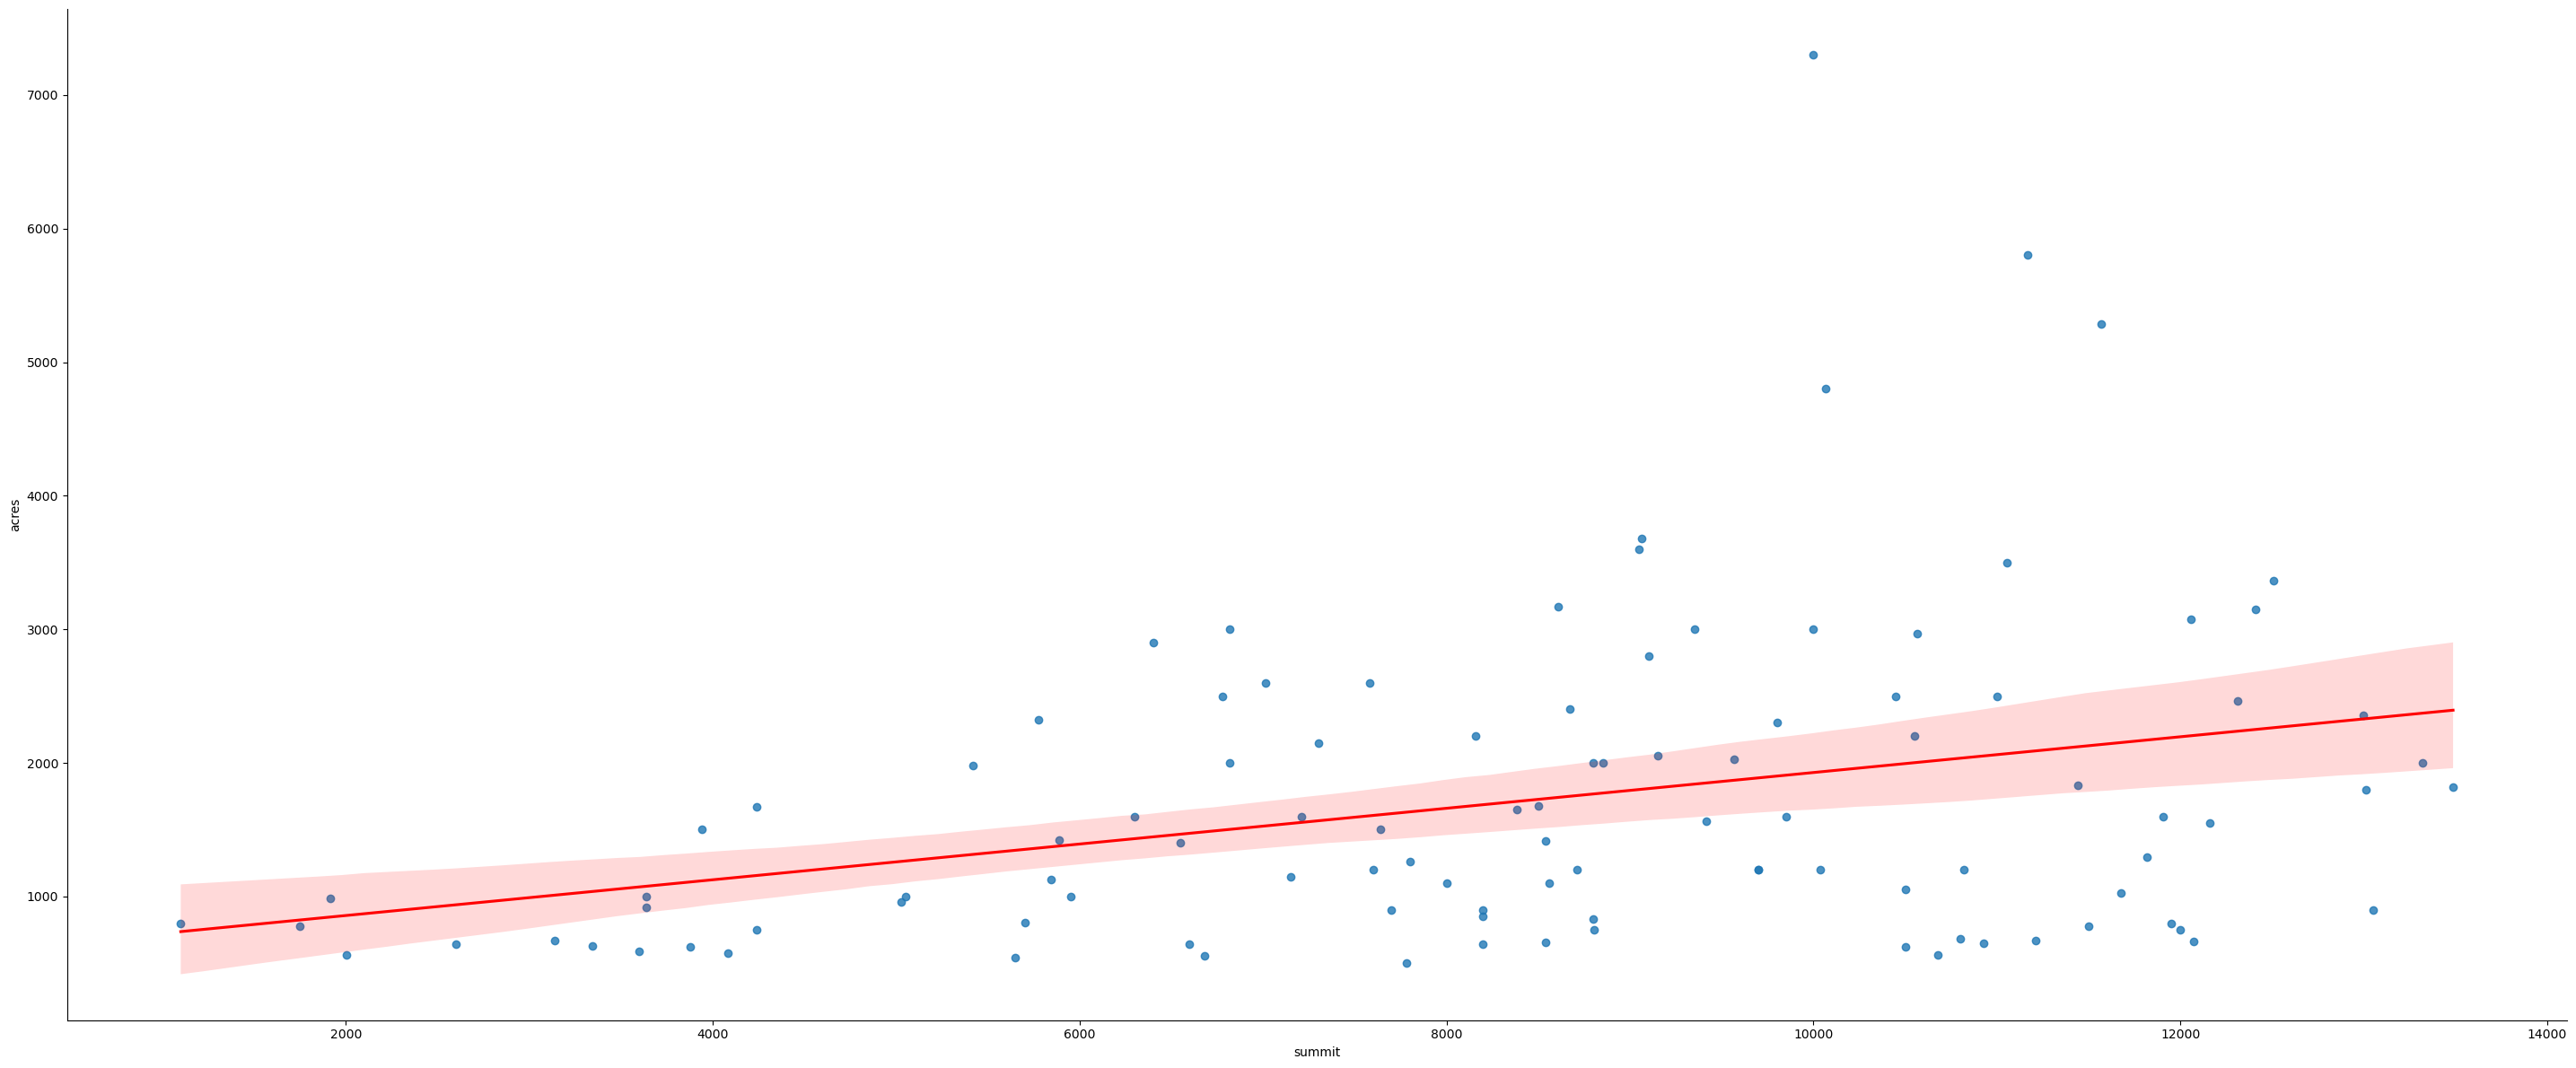

In [599]:
# Next I am going to plot DF2's resorts by their summit elevation as well as their acres to see 
# if there is a correlation between the two.
# This will help determine the validaty of ruling out certain resorts due to being in low altitude 
sb.lmplot(data=DF2, x='summit', y='acres', height=12, aspect=2.4, line_kws={'color': 'red'}) # use seaborn to plot

In [600]:
# It looks like most resorts with high summit elevation do not need to be high in acres but to be high in acres
# they generally need to be pretty high up.

In [601]:
# Now I want to incorperate the first DF
# My goal is to narrow down each DF to a list of around 10 resorts by different means/definitions of "best".
# I am looking to see over five resorts that are present in both Data Frames to then narrow the list down to those.

In [602]:
# I will now narrow down this DF by looking at rating compared to number of total slope length to see if it is a
# valid means to reduce resort count by.

/Users/mattabatangle/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


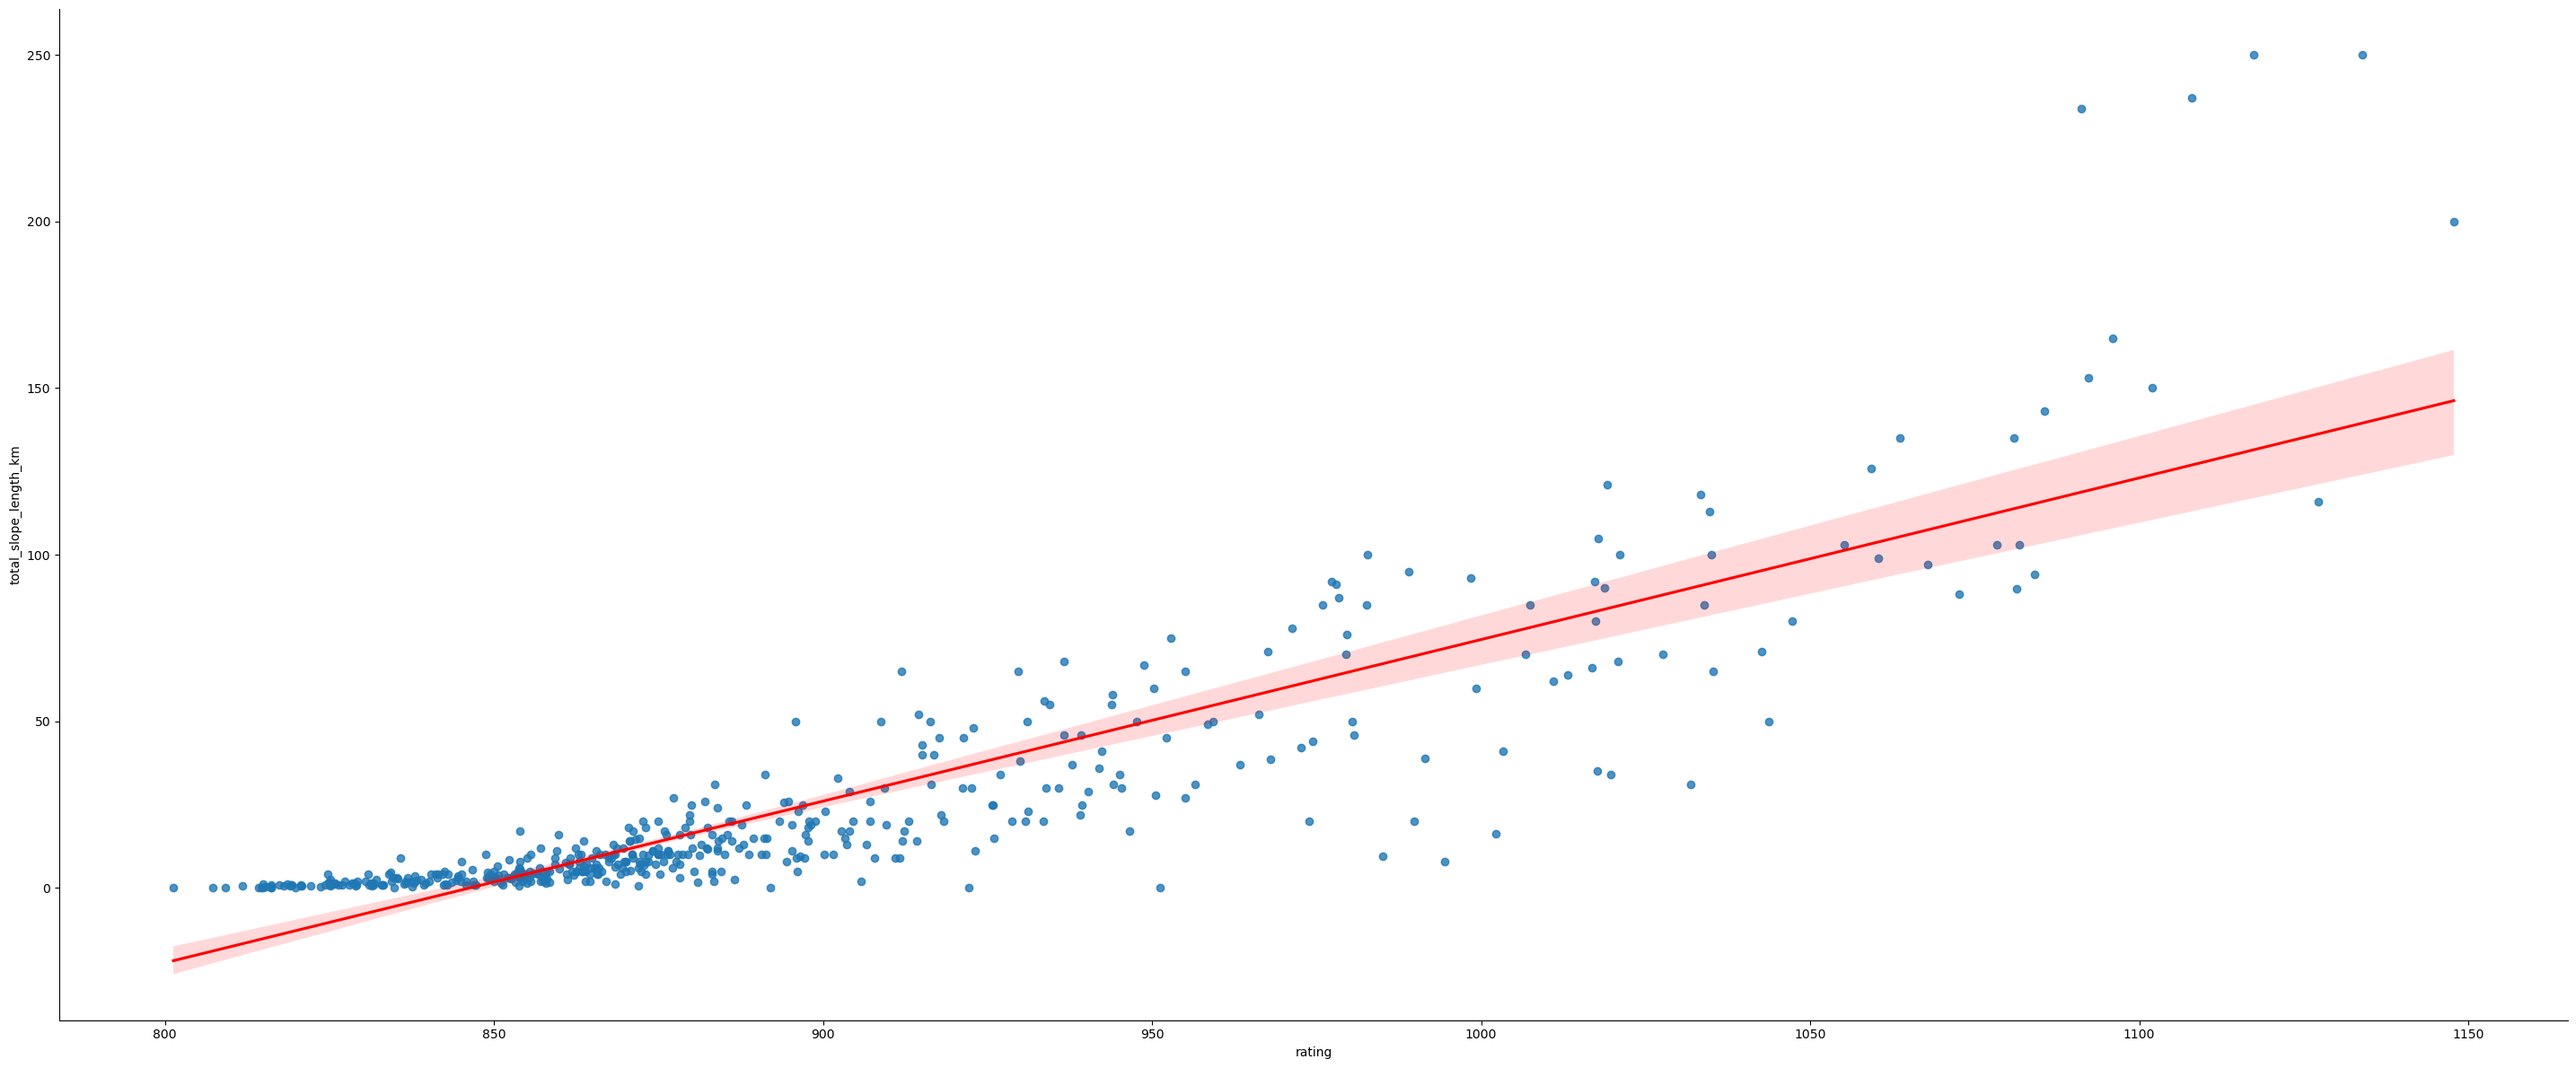

In [603]:
sb.lmplot(data=DF1, x='rating', y='total_slope_length_km', height=12, aspect=2.4, line_kws={'color': 'red'}) # use seaborn to plot

/Users/mattabatangle/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


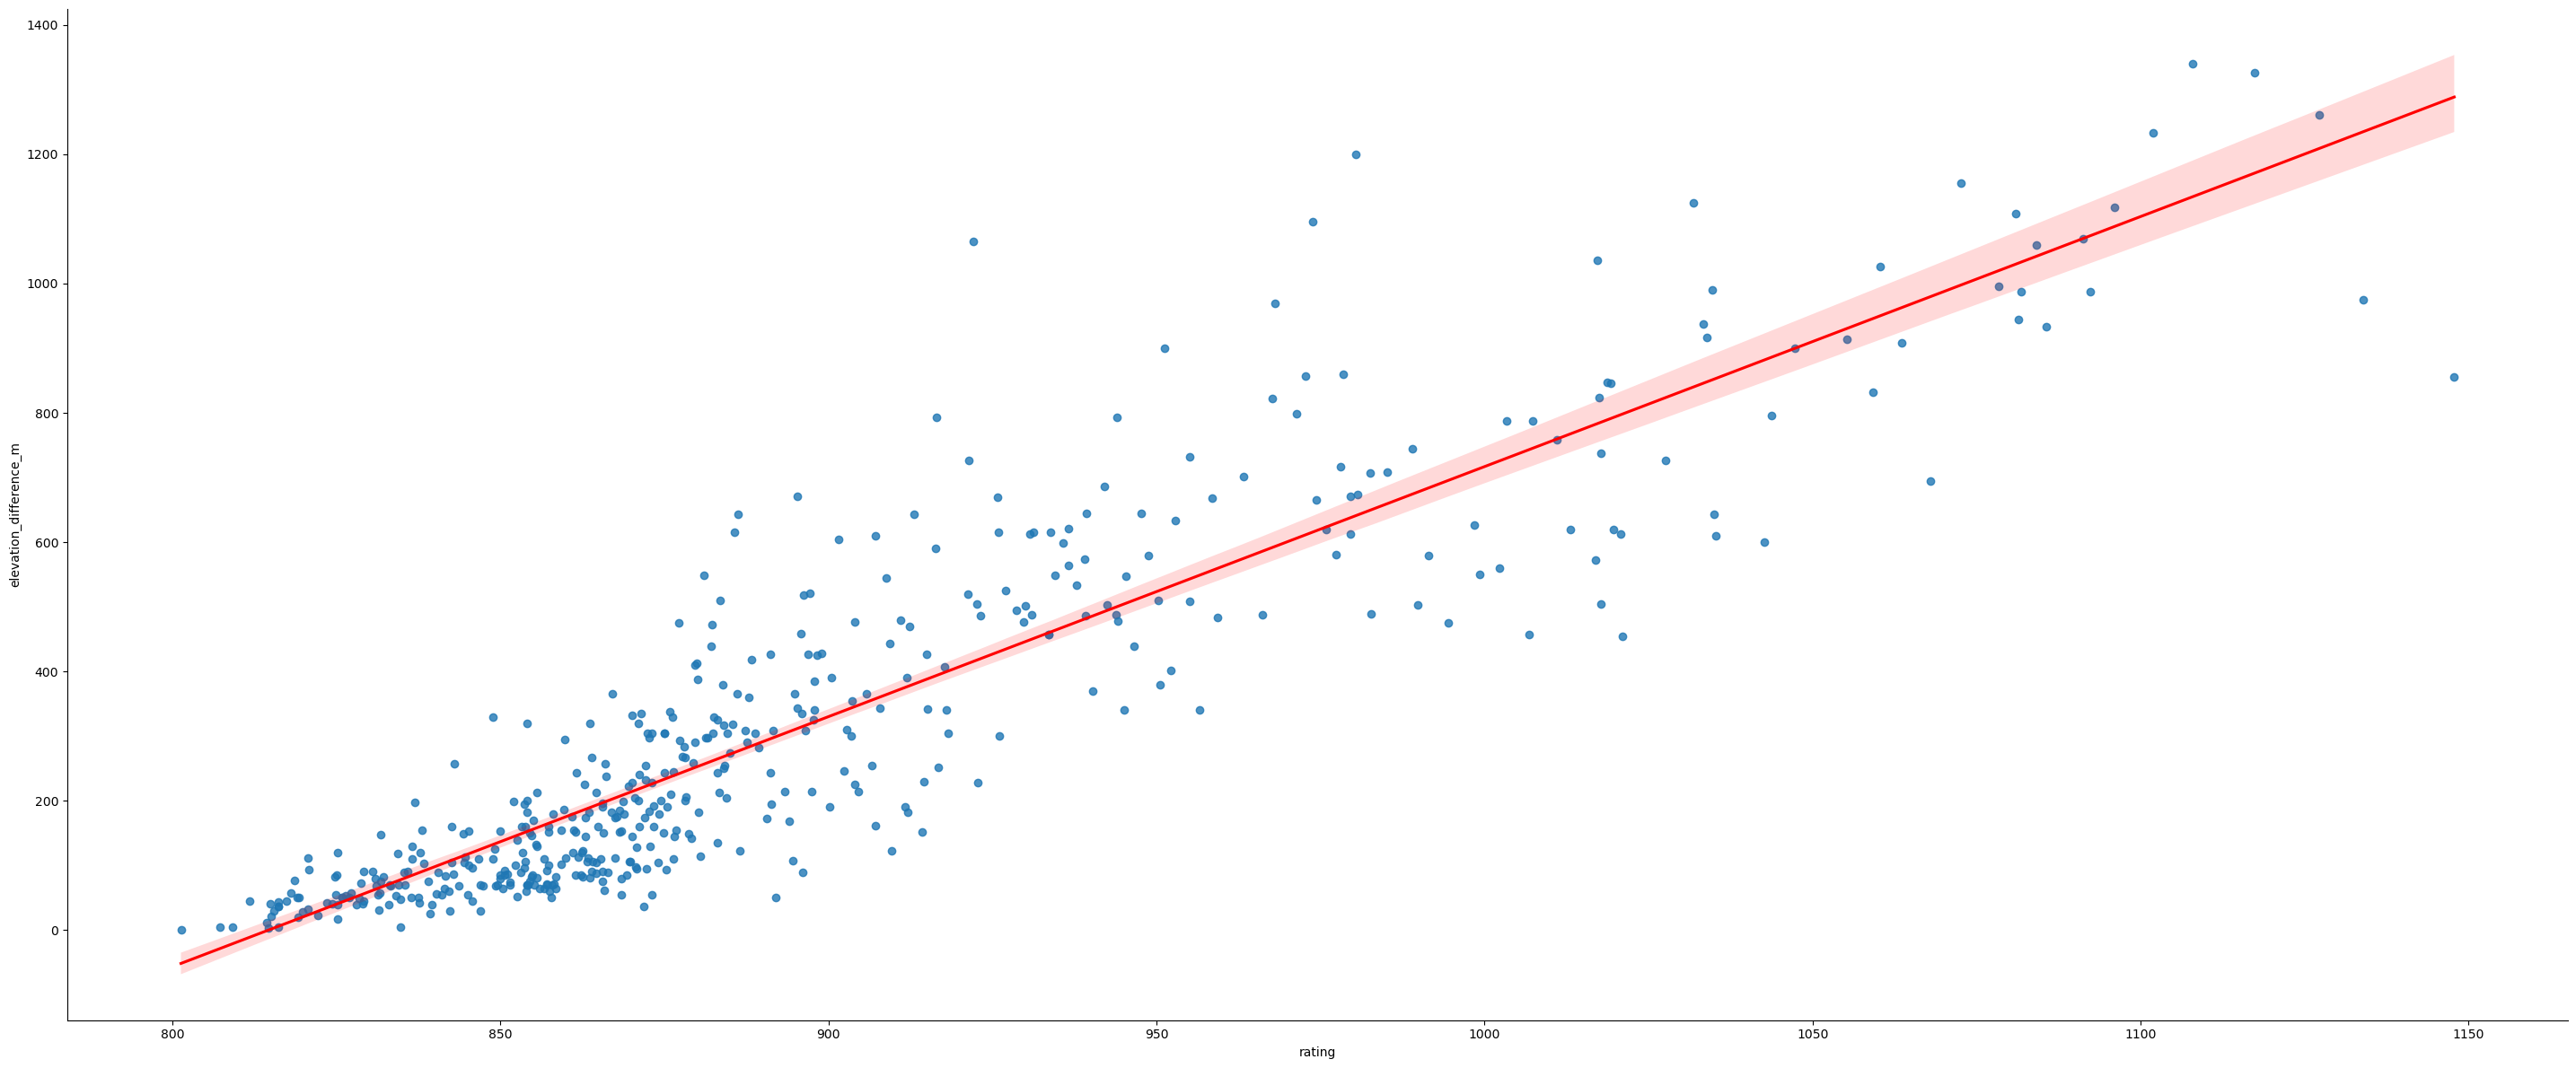

In [604]:
# There seems to be a strong relationship between total slope length and their public rating
# I now want to do the same for elevation difference top to bottom
sb.lmplot(data=DF1, x='rating', y='elevation_difference_m', height=12, aspect=2.4, line_kws={'color': 'red'}) # use seaborn to plot

In [605]:
# I will now cut off all resorts below 300 elevation difference and a slope length of 50km
DF1 = DF1[(DF1['elevation_difference_m'] >= 300) & (DF1['total_slope_length_km'] >= 50)]

<Axes: xlabel='lifts', ylabel='runs'>

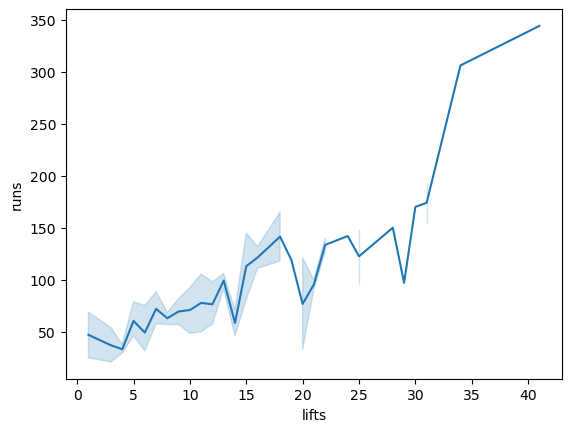

In [606]:
# Now I want to look more into the amount of lifts compared to runs
sb.lineplot(data=DF2, x="lifts", y="runs")

In [607]:
# I would like to make a stat for DF2 that compares the amount of runs per foot of vertical drop
# to see how much of the terrain present at each resort is actually skiable. 
# This will help me group resorts by size compared to runs.
DF2["ski-ability"] = DF2["runs"]/DF2["vertical"]

/var/folders/8_/97h3lg5n5t1_4cxd7qxfj24c0000gn/T/ipykernel_69211/3631113530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2["ski-ability"] = DF2["runs"]/DF2["vertical"]


<Axes: xlabel='acres', ylabel='ski-ability'>

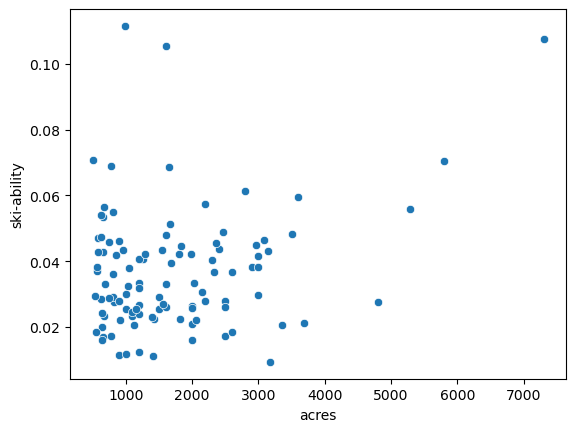

In [608]:
# This seaborn graph shows acres compared to skiability to look if it is a valid measure.
sb.scatterplot(data=DF2, x="acres", y="ski-ability")

In [609]:
# I would like to filter out any resorts with overwhelming amounts of one kind of run (blue, green, black) as
# it is essential for resorts to offer a wide variety of terrain to make skiing enjoyable to all levels of 
# resort-goers.

blackDF = DF2[
    (DF2['black_percent'] > DF2['blue_percent']) &
    (DF2['black_percent'] > DF2['green_percent'])
]
blueDF = DF2[
    (DF2['blue_percent'] > DF2['black_percent']) &
    (DF2['blue_percent'] > DF2['green_percent'])
]
greenDF = DF2[
    (DF2['green_percent'] > DF2['blue_percent']) &
    (DF2['green_percent'] > DF2['black_percent'])
]

In [610]:
blackDF

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon,ski-ability
11,"Anthony Lakes, OR",Oregon,8000.0,7100.0,900.0,3.0,21.0,1100,0.20,220.00,0.38,418.00,0.42,462.00,44.97,-118.23,0.023333
14,"Arapahoe Basin, CO",Colorado,13050.0,10780.0,2270.0,7.0,105.0,900,0.10,90.00,0.30,270.00,0.60,540.00,39.72,-104.79,0.046256
17,"Aspen Highlands, CO",Colorado,11675.0,8040.0,3635.0,5.0,118.0,1028,0.18,185.04,0.30,308.40,0.52,534.56,39.12,-106.85,0.032462
18,"Aspen Mt, CO",Colorado,11212.0,7945.0,3267.0,8.0,76.0,673,0.00,0.00,0.48,323.04,0.52,349.96,39.17,-106.82,0.023263
34,"Big Sky, MT",Montana,11166.0,6800.0,4350.0,34.0,306.0,5800,0.15,870.00,0.25,1450.00,0.60,3480.00,45.29,-111.38,0.070345
55,"Breckenridge, CO",Colorado,12998.0,9600.0,3398.0,31.0,155.0,2358,0.14,330.12,0.31,730.98,0.55,1296.90,39.49,-106.03,0.045615
58,"Bridger Bowl, MT",Montana,8800.0,6100.0,2700.0,8.0,71.0,2000,0.20,400.00,0.30,600.00,0.50,1000.00,45.83,-110.89,0.026296
81,"China Peak, CA",California,8709.0,7030.0,1679.0,11.0,45.0,1200,0.11,132.00,0.28,336.00,0.61,732.00,40.90,-123.34,0.026802
89,"Copper Mt, CO",Colorado,12313.0,9712.0,2601.0,22.0,127.0,2465,0.21,517.65,0.25,616.25,0.54,1331.10,39.46,-106.17,0.048827
101,"Discovery Basin, MT",Montana,8158.0,5770.0,2388.0,7.0,67.0,2200,0.20,440.00,0.25,550.00,0.55,1210.00,46.26,-112.26,0.028057


In [611]:
blueDF

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon,ski-ability
0,"49(degrees) North, WA",Washington,5774.0,3923.0,1851.0,6.0,68.0,2325,0.30,697.50,0.40,930.00,0.30,697.50,49.00,-115.84,0.036737
2,"Alpine Meadows, CA",California,8673.0,6385.0,2288.0,13.0,100.0,2400,0.25,600.00,0.40,960.00,0.35,840.00,39.17,-120.22,0.043706
7,"Alta, UT",Utah,10550.0,8530.0,2020.0,11.0,116.0,2200,0.25,550.00,0.40,880.00,0.35,770.00,40.60,-111.64,0.057426
8,"Alyeska, AK",Alaska,3939.0,250.0,2500.0,9.0,73.0,1500,0.11,165.00,0.52,780.00,0.37,555.00,60.97,-149.11,0.029200
10,"Angel Fire, NM",New Mexico,10677.0,8600.0,2077.0,7.0,77.0,560,0.26,145.60,0.50,280.00,0.24,134.40,36.39,-105.29,0.037073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,"The Summit at Snoqualmie, WA",Washington,5420.0,2610.0,2280.0,25.0,96.0,1981,0.14,277.34,0.45,891.45,0.41,812.21,47.75,-120.74,0.042105
324,"Timberline, OR",Oregon,8540.0,4850.0,3690.0,9.0,41.0,1415,0.25,353.75,0.50,707.50,0.25,353.75,45.31,-121.74,0.011111
342,"White Pass, WA",Washington,6550.0,4500.0,2050.0,8.0,47.0,1402,0.15,210.30,0.65,911.30,0.20,280.40,46.64,-121.39,0.022927
350,"Willamette Pass, OR",Oregon,6683.0,5120.0,1563.0,6.0,29.0,555,0.21,116.55,0.45,249.75,0.34,188.70,43.61,-122.03,0.018554


In [612]:
greenDF

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon,ski-ability
296,"Stratton Mountain, VT",Vermont,3875.0,1872.0,2003.0,11.0,95.0,625,0.41,256.25,0.33,206.25,0.26,162.5,43.12,-72.9,0.047429


<Axes: xlabel='runs', ylabel='black_percent'>

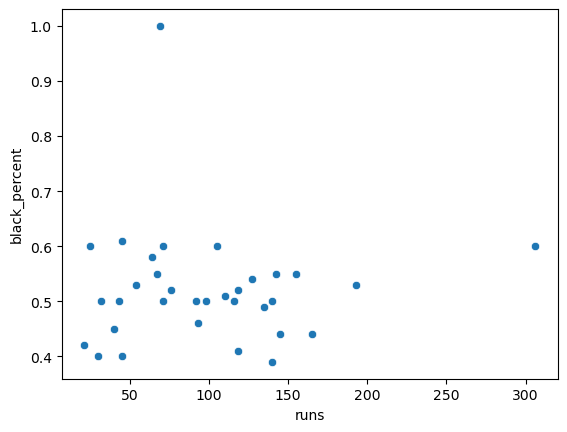

In [720]:
# I am using scatter plots a lot as they work the best with large amounts of data points
# The next 3 look at runs compared to each type of runs percentage on said mountain
sb.scatterplot(data=blackDF, x="runs", y="black_percent")

<Axes: xlabel='runs', ylabel='blue_percent'>

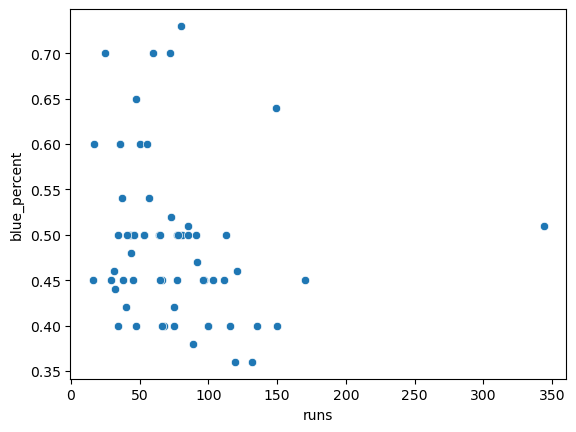

In [614]:
sb.scatterplot(data=blueDF, x="runs", y="blue_percent")

<Axes: xlabel='runs', ylabel='green_percent'>

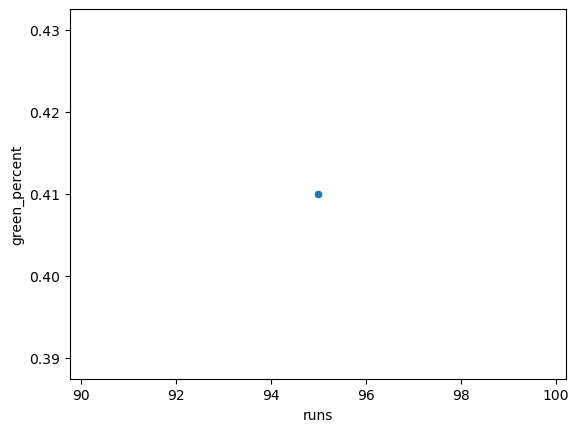

In [615]:
sb.scatterplot(data=greenDF, x="runs", y="green_percent")

In [616]:
# In general, it would be best to have a lot of blue runs with a solid amount of black and green runs for extremes.
# But due to location, some skiers will be better in certain locations (utah, colorado, vermont, etc.) due to more
# easily accessible resorts.
topSt = ['Colorado', 'Utah', 'Montana', 'Idaho', 'Vermont', 'California', 'Wyoming']
rtk1 = [] 

for index1, row1 in DF2.iterrows(): # Iterate through DF2
    if row1['state'] in topSt: # Check if row is in top state
        if row1['black_percent'] >= 0.50: # Check stats
            if row1['black_percent'] < 0.70:
                rtk1.append(row1)
    elif row1['black_percent'] <= .50:
        rtk1.append(row1)

DF2 = pd.DataFrame(rtk1)

In [617]:
DF2

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon,ski-ability
0,"49(degrees) North, WA",Washington,5774.0,3923.0,1851.0,6.0,68.0,2325,0.30,697.50,0.40,930.00,0.30,697.50,49.00000,-115.84000,0.036737
8,"Alyeska, AK",Alaska,3939.0,250.0,2500.0,9.0,73.0,1500,0.11,165.00,0.52,780.00,0.37,555.00,60.97000,-149.11000,0.029200
10,"Angel Fire, NM",New Mexico,10677.0,8600.0,2077.0,7.0,77.0,560,0.26,145.60,0.50,280.00,0.24,134.40,36.39000,-105.29000,0.037073
11,"Anthony Lakes, OR",Oregon,8000.0,7100.0,900.0,3.0,21.0,1100,0.20,220.00,0.38,418.00,0.42,462.00,44.97000,-118.23000,0.023333
14,"Arapahoe Basin, CO",Colorado,13050.0,10780.0,2270.0,7.0,105.0,900,0.10,90.00,0.30,270.00,0.60,540.00,39.72000,-104.79000,0.046256
16,"Arizona Snowball, AZ",Arizona,11500.0,9200.0,2300.0,6.0,40.0,777,0.37,287.49,0.42,326.34,0.21,163.17,35.32782,-111.69517,0.017391
17,"Aspen Highlands, CO",Colorado,11675.0,8040.0,3635.0,5.0,118.0,1028,0.18,185.04,0.30,308.40,0.52,534.56,39.12000,-106.85000,0.032462
18,"Aspen Mt, CO",Colorado,11212.0,7945.0,3267.0,8.0,76.0,673,0.00,0.00,0.48,323.04,0.52,349.96,39.17000,-106.82000,0.023263
34,"Big Sky, MT",Montana,11166.0,6800.0,4350.0,34.0,306.0,5800,0.15,870.00,0.25,1450.00,0.60,3480.00,45.29000,-111.38000,0.070345
55,"Breckenridge, CO",Colorado,12998.0,9600.0,3398.0,31.0,155.0,2358,0.14,330.12,0.31,730.98,0.55,1296.90,39.49000,-106.03000,0.045615


In [618]:
# Now I would like to do the same to resorts with more than .4 percent blues
rtk2 = []

for index2, row2 in DF2.iterrows():
    if row2['blue_percent'] <= 0.40:
        rtk2.append(row2)
DF2 = pd.DataFrame(rtk2)

In [619]:
DF2

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon,ski-ability
0,"49(degrees) North, WA",Washington,5774.0,3923.0,1851.0,6.0,68.0,2325,0.30,697.50,0.40,930.00,0.30,697.50,49.00,-115.84,0.036737
11,"Anthony Lakes, OR",Oregon,8000.0,7100.0,900.0,3.0,21.0,1100,0.20,220.00,0.38,418.00,0.42,462.00,44.97,-118.23,0.023333
14,"Arapahoe Basin, CO",Colorado,13050.0,10780.0,2270.0,7.0,105.0,900,0.10,90.00,0.30,270.00,0.60,540.00,39.72,-104.79,0.046256
17,"Aspen Highlands, CO",Colorado,11675.0,8040.0,3635.0,5.0,118.0,1028,0.18,185.04,0.30,308.40,0.52,534.56,39.12,-106.85,0.032462
34,"Big Sky, MT",Montana,11166.0,6800.0,4350.0,34.0,306.0,5800,0.15,870.00,0.25,1450.00,0.60,3480.00,45.29,-111.38,0.070345
55,"Breckenridge, CO",Colorado,12998.0,9600.0,3398.0,31.0,155.0,2358,0.14,330.12,0.31,730.98,0.55,1296.90,39.49,-106.03,0.045615
58,"Bridger Bowl, MT",Montana,8800.0,6100.0,2700.0,8.0,71.0,2000,0.20,400.00,0.30,600.00,0.50,1000.00,45.83,-110.89,0.026296
81,"China Peak, CA",California,8709.0,7030.0,1679.0,11.0,45.0,1200,0.11,132.00,0.28,336.00,0.61,732.00,40.90,-123.34,0.026802
89,"Copper Mt, CO",Colorado,12313.0,9712.0,2601.0,22.0,127.0,2465,0.21,517.65,0.25,616.25,0.54,1331.10,39.46,-106.17,0.048827
101,"Discovery Basin, MT",Montana,8158.0,5770.0,2388.0,7.0,67.0,2200,0.20,440.00,0.25,550.00,0.55,1210.00,46.26,-112.26,0.028057


In [620]:
# For this DF, I think it is appropriate to filter out more resorts by their pure size as most resorts considered 
# "The Best" will have lots of variety in terrain and provide amenities that smaller resorts just do not have.
rtk3 = []
for index3, row3 in DF2.iterrows():
    if row3['lifts'] > 10.0:
        if row3['runs'] > 50.0:
            rtk3.append(row3)
DF2 = pd.DataFrame(rtk3)

In [621]:
DF2 # Top Nine

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon,ski-ability
34,"Big Sky, MT",Montana,11166.0,6800.0,4350.0,34.0,306.0,5800,0.15,870.00,0.25,1450.00,0.60,3480.00,45.29,-111.38,0.070345
55,"Breckenridge, CO",Colorado,12998.0,9600.0,3398.0,31.0,155.0,2358,0.14,330.12,0.31,730.98,0.55,1296.90,39.49,-106.03,0.045615
89,"Copper Mt, CO",Colorado,12313.0,9712.0,2601.0,22.0,127.0,2465,0.21,517.65,0.25,616.25,0.54,1331.10,39.46,-106.17,0.048827
145,"Jackson Hole, WY",Wyoming,10450.0,6311.0,4139.0,12.0,116.0,2500,0.10,250.00,0.40,1000.00,0.50,1250.00,43.49,-110.75,0.028026
300,"Sugarloaf, ME",Maine,4237.0,1417.0,2820.0,15.0,145.0,1670,0.23,384.10,0.33,551.10,0.44,734.80,44.56,-70.43,0.051418
306,"Sunday River, ME",Maine,3140.0,800.0,2340.0,16.0,132.0,667,0.33,220.11,0.36,240.12,0.31,206.77,44.46,-70.80,0.056410
334,"Vail, CO",Colorado,11570.0,8120.0,3450.0,31.0,193.0,5289,0.18,952.02,0.29,1533.81,0.53,2803.17,39.64,-106.36,0.055942
346,"Whitefish Mountain, MT",Montana,6817.0,4464.0,2353.0,13.0,98.0,3000,0.15,450.00,0.35,1050.00,0.50,1500.00,48.76,-114.59,0.041649
354,"Winter Park, CO",Colorado,12060.0,9000.0,3060.0,24.0,142.0,3078,0.08,246.24,0.37,1138.86,0.55,1692.90,39.88,-105.75,0.046405


In [622]:
DF1

,rank,name,rating,url,location_coordinate,location_country,location_region,elevation_top_m,elevation_difference_m,total_slope_length_km,number_of_lifts,number_of_slopes,annual_snowfall_cm,number_of_matches
10,11,Palisades Tahoe,1147.8,https://www.palisadestahoe.com,"{'lat': '39.1971', 'long': '-120.2357'}",USA,California,2745.0,855.0,200.0,43.0,43.0,1194.0,9
17,18,Park City,1133.9,https://www.parkcitymountain.com/,"{'lat': '40.6514', 'long': '-111.5076'}",USA,Utah,3048.0,975.0,250.0,42.0,213.0,900.0,1
20,21,Jackson Hole,1127.2,https://www.jacksonhole.com/,"{'lat': '43.5875', 'long': '-110.8277'}",USA,Wyoming,3185.0,1261.0,116.0,13.0,116.0,1200.0,1
28,29,Big Sky Resort,1117.4,https://bigskyresort.com/,"{'lat': '45.2845', 'long': '-111.4014'}",USA,Montana,3398.0,1326.0,250.0,38.0,300.0,1016.0,1
36,37,Snowmass,1107.9,https://www.aspensnowmass.com/,"{'lat': '39.2097', 'long': '-106.9378'}",USA,Colorado,3813.0,1340.0,237.0,20.0,40.0,760.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,741,Sunrise Park,929.7,https://www.sunrise.ski/,"{'lat': '34.0394', 'long': '-109.5634'}",USA,Arizona,3330.0,477.0,65.0,7.0,67.0,400.0,1
918,919,Lost Trail Powder Mountain,916.3,http://www.losttrail.com,"{'lat': '45.6926', 'long': '-113.9507'}",USA,Montana,2550.0,590.0,50.0,8.0,10.0,600.0,1
981,982,Mt. Hood Skibowl,911.9,https://www.skibowl.com/,"{'lat': '45.3049', 'long': '-121.7644'}",USA,Oregon,1510.0,390.0,65.0,9.0,65.0,300.0,1
1024,1025,Bogus Basin,908.8,https://bogusbasin.org/,"{'lat': '43.7648', 'long': '-116.1015'}",USA,Idaho,2311.0,544.0,50.0,7.0,30.0,250.0,1


In [623]:
# Now going back to DF1, we are given pre-decided ranks that I would like to take advantage of to add an aspect of 
# public opinion in to the project since there are some factors we cannot account for (resort and living quality,
# quality of dining, etc.)
# This will help only look at resorts that have an actual shot to be considered top resorts

In [624]:
DF1 = DF1[DF1['rank'] < 100]

In [625]:
DF1

,rank,name,rating,url,location_coordinate,location_country,location_region,elevation_top_m,elevation_difference_m,total_slope_length_km,number_of_lifts,number_of_slopes,annual_snowfall_cm,number_of_matches
10,11,Palisades Tahoe,1147.8,https://www.palisadestahoe.com,"{'lat': '39.1971', 'long': '-120.2357'}",USA,California,2745.0,855.0,200.0,43.0,43.0,1194.0,9
17,18,Park City,1133.9,https://www.parkcitymountain.com/,"{'lat': '40.6514', 'long': '-111.5076'}",USA,Utah,3048.0,975.0,250.0,42.0,213.0,900.0,1
20,21,Jackson Hole,1127.2,https://www.jacksonhole.com/,"{'lat': '43.5875', 'long': '-110.8277'}",USA,Wyoming,3185.0,1261.0,116.0,13.0,116.0,1200.0,1
28,29,Big Sky Resort,1117.4,https://bigskyresort.com/,"{'lat': '45.2845', 'long': '-111.4014'}",USA,Montana,3398.0,1326.0,250.0,38.0,300.0,1016.0,1
36,37,Snowmass,1107.9,https://www.aspensnowmass.com/,"{'lat': '39.2097', 'long': '-106.9378'}",USA,Colorado,3813.0,1340.0,237.0,20.0,40.0,760.0,1
40,41,Beaver Creek,1101.9,https://www.beavercreek.com/,"{'lat': '39.6043', 'long': '-106.5167'}",USA,Colorado,3488.0,1233.0,150.0,25.0,47.0,752.0,1
43,44,Steamboat,1096.0,https://www.steamboat.com/,"{'lat': '40.4850', 'long': '-106.8317'}",USA,Colorado,3221.0,1118.0,165.0,20.0,0.0,760.0,1
50,51,Breckenridge,1092.3,https://www.breckenridge.com/,"{'lat': '39.4817', 'long': '-106.0384'}",USA,Colorado,3914.0,988.0,153.0,35.0,46.0,762.0,1
51,52,Vail,1091.2,https://www.vail.com/,"{'lat': '39.6061', 'long': '-106.3550'}",USA,Colorado,3527.0,1070.0,234.0,34.0,150.0,750.0,9
54,55,Winter Park Resort,1085.6,https://www.winterparkresort.com/,"{'lat': '39.8860', 'long': '-105.7625'}",USA,Colorado,3676.0,933.0,143.0,25.0,39.0,760.0,1


In [626]:
# Now I want to incoperate snowfall as I transition to looking more at the weather patterns of each of our top 
# resorts. 
DF1 = DF1[DF1['annual_snowfall_cm'] > 700]

In [627]:
DF1

,rank,name,rating,url,location_coordinate,location_country,location_region,elevation_top_m,elevation_difference_m,total_slope_length_km,number_of_lifts,number_of_slopes,annual_snowfall_cm,number_of_matches
10,11,Palisades Tahoe,1147.8,https://www.palisadestahoe.com,"{'lat': '39.1971', 'long': '-120.2357'}",USA,California,2745.0,855.0,200.0,43.0,43.0,1194.0,9
17,18,Park City,1133.9,https://www.parkcitymountain.com/,"{'lat': '40.6514', 'long': '-111.5076'}",USA,Utah,3048.0,975.0,250.0,42.0,213.0,900.0,1
20,21,Jackson Hole,1127.2,https://www.jacksonhole.com/,"{'lat': '43.5875', 'long': '-110.8277'}",USA,Wyoming,3185.0,1261.0,116.0,13.0,116.0,1200.0,1
28,29,Big Sky Resort,1117.4,https://bigskyresort.com/,"{'lat': '45.2845', 'long': '-111.4014'}",USA,Montana,3398.0,1326.0,250.0,38.0,300.0,1016.0,1
36,37,Snowmass,1107.9,https://www.aspensnowmass.com/,"{'lat': '39.2097', 'long': '-106.9378'}",USA,Colorado,3813.0,1340.0,237.0,20.0,40.0,760.0,1
40,41,Beaver Creek,1101.9,https://www.beavercreek.com/,"{'lat': '39.6043', 'long': '-106.5167'}",USA,Colorado,3488.0,1233.0,150.0,25.0,47.0,752.0,1
43,44,Steamboat,1096.0,https://www.steamboat.com/,"{'lat': '40.4850', 'long': '-106.8317'}",USA,Colorado,3221.0,1118.0,165.0,20.0,0.0,760.0,1
50,51,Breckenridge,1092.3,https://www.breckenridge.com/,"{'lat': '39.4817', 'long': '-106.0384'}",USA,Colorado,3914.0,988.0,153.0,35.0,46.0,762.0,1
51,52,Vail,1091.2,https://www.vail.com/,"{'lat': '39.6061', 'long': '-106.3550'}",USA,Colorado,3527.0,1070.0,234.0,34.0,150.0,750.0,9
54,55,Winter Park Resort,1085.6,https://www.winterparkresort.com/,"{'lat': '39.8860', 'long': '-105.7625'}",USA,Colorado,3676.0,933.0,143.0,25.0,39.0,760.0,1


<Axes: xlabel='total_slope_length_km', ylabel='rank'>

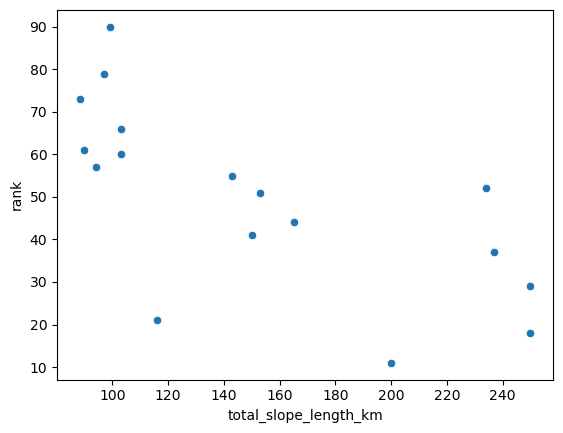

In [665]:
# Looking at rank compared to slope length in km
sb.scatterplot(data=DF1, x="total_slope_length_km", y="rank")

In [647]:
# I am going to finish off this DF's filtering by removing the smallest of the mountains
# At this point these are all great resorts but some just lack in slope/resort size

In [648]:
DF1

,rank,name,rating,url,location_coordinate,location_country,location_region,elevation_top_m,elevation_difference_m,total_slope_length_km,number_of_lifts,number_of_slopes,annual_snowfall_cm,number_of_matches
10,11,Palisades Tahoe,1147.8,https://www.palisadestahoe.com,"{'lat': '39.1971', 'long': '-120.2357'}",USA,California,2745.0,855.0,200.0,43.0,43.0,1194.0,9
17,18,Park City,1133.9,https://www.parkcitymountain.com/,"{'lat': '40.6514', 'long': '-111.5076'}",USA,Utah,3048.0,975.0,250.0,42.0,213.0,900.0,1
20,21,Jackson Hole,1127.2,https://www.jacksonhole.com/,"{'lat': '43.5875', 'long': '-110.8277'}",USA,Wyoming,3185.0,1261.0,116.0,13.0,116.0,1200.0,1
28,29,Big Sky Resort,1117.4,https://bigskyresort.com/,"{'lat': '45.2845', 'long': '-111.4014'}",USA,Montana,3398.0,1326.0,250.0,38.0,300.0,1016.0,1
36,37,Snowmass,1107.9,https://www.aspensnowmass.com/,"{'lat': '39.2097', 'long': '-106.9378'}",USA,Colorado,3813.0,1340.0,237.0,20.0,40.0,760.0,1
40,41,Beaver Creek,1101.9,https://www.beavercreek.com/,"{'lat': '39.6043', 'long': '-106.5167'}",USA,Colorado,3488.0,1233.0,150.0,25.0,47.0,752.0,1
43,44,Steamboat,1096.0,https://www.steamboat.com/,"{'lat': '40.4850', 'long': '-106.8317'}",USA,Colorado,3221.0,1118.0,165.0,20.0,0.0,760.0,1
50,51,Breckenridge,1092.3,https://www.breckenridge.com/,"{'lat': '39.4817', 'long': '-106.0384'}",USA,Colorado,3914.0,988.0,153.0,35.0,46.0,762.0,1
51,52,Vail,1091.2,https://www.vail.com/,"{'lat': '39.6061', 'long': '-106.3550'}",USA,Colorado,3527.0,1070.0,234.0,34.0,150.0,750.0,9
54,55,Winter Park Resort,1085.6,https://www.winterparkresort.com/,"{'lat': '39.8860', 'long': '-105.7625'}",USA,Colorado,3676.0,933.0,143.0,25.0,39.0,760.0,1


In [668]:
DF1 = DF1[DF1['total_slope_length_km'] > 105] 

In [669]:
DF1 # DF1 before API use

,rank,name,rating,url,location_coordinate,location_country,location_region,elevation_top_m,elevation_difference_m,total_slope_length_km,number_of_lifts,number_of_slopes,annual_snowfall_cm,number_of_matches
10,11,Palisades Tahoe,1147.8,https://www.palisadestahoe.com,"{'lat': '39.1971', 'long': '-120.2357'}",USA,California,2745.0,855.0,200.0,43.0,43.0,1194.0,9
17,18,Park City,1133.9,https://www.parkcitymountain.com/,"{'lat': '40.6514', 'long': '-111.5076'}",USA,Utah,3048.0,975.0,250.0,42.0,213.0,900.0,1
20,21,Jackson Hole,1127.2,https://www.jacksonhole.com/,"{'lat': '43.5875', 'long': '-110.8277'}",USA,Wyoming,3185.0,1261.0,116.0,13.0,116.0,1200.0,1
28,29,Big Sky Resort,1117.4,https://bigskyresort.com/,"{'lat': '45.2845', 'long': '-111.4014'}",USA,Montana,3398.0,1326.0,250.0,38.0,300.0,1016.0,1
36,37,Snowmass,1107.9,https://www.aspensnowmass.com/,"{'lat': '39.2097', 'long': '-106.9378'}",USA,Colorado,3813.0,1340.0,237.0,20.0,40.0,760.0,1
40,41,Beaver Creek,1101.9,https://www.beavercreek.com/,"{'lat': '39.6043', 'long': '-106.5167'}",USA,Colorado,3488.0,1233.0,150.0,25.0,47.0,752.0,1
43,44,Steamboat,1096.0,https://www.steamboat.com/,"{'lat': '40.4850', 'long': '-106.8317'}",USA,Colorado,3221.0,1118.0,165.0,20.0,0.0,760.0,1
50,51,Breckenridge,1092.3,https://www.breckenridge.com/,"{'lat': '39.4817', 'long': '-106.0384'}",USA,Colorado,3914.0,988.0,153.0,35.0,46.0,762.0,1
51,52,Vail,1091.2,https://www.vail.com/,"{'lat': '39.6061', 'long': '-106.3550'}",USA,Colorado,3527.0,1070.0,234.0,34.0,150.0,750.0,9
54,55,Winter Park Resort,1085.6,https://www.winterparkresort.com/,"{'lat': '39.8860', 'long': '-105.7625'}",USA,Colorado,3676.0,933.0,143.0,25.0,39.0,760.0,1


In [670]:
 DF2 # DF2 before API use

,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon,ski-ability
34,"Big Sky, MT",Montana,11166.0,6800.0,4350.0,34.0,306.0,5800,0.15,870.00,0.25,1450.00,0.60,3480.00,45.29,-111.38,0.070345
55,"Breckenridge, CO",Colorado,12998.0,9600.0,3398.0,31.0,155.0,2358,0.14,330.12,0.31,730.98,0.55,1296.90,39.49,-106.03,0.045615
89,"Copper Mt, CO",Colorado,12313.0,9712.0,2601.0,22.0,127.0,2465,0.21,517.65,0.25,616.25,0.54,1331.10,39.46,-106.17,0.048827
145,"Jackson Hole, WY",Wyoming,10450.0,6311.0,4139.0,12.0,116.0,2500,0.10,250.00,0.40,1000.00,0.50,1250.00,43.49,-110.75,0.028026
300,"Sugarloaf, ME",Maine,4237.0,1417.0,2820.0,15.0,145.0,1670,0.23,384.10,0.33,551.10,0.44,734.80,44.56,-70.43,0.051418
306,"Sunday River, ME",Maine,3140.0,800.0,2340.0,16.0,132.0,667,0.33,220.11,0.36,240.12,0.31,206.77,44.46,-70.80,0.056410
334,"Vail, CO",Colorado,11570.0,8120.0,3450.0,31.0,193.0,5289,0.18,952.02,0.29,1533.81,0.53,2803.17,39.64,-106.36,0.055942
346,"Whitefish Mountain, MT",Montana,6817.0,4464.0,2353.0,13.0,98.0,3000,0.15,450.00,0.35,1050.00,0.50,1500.00,48.76,-114.59,0.041649
354,"Winter Park, CO",Colorado,12060.0,9000.0,3060.0,24.0,142.0,3078,0.08,246.24,0.37,1138.86,0.55,1692.90,39.88,-105.75,0.046405


In [715]:
# My final factor to narrow these lists down will be to look at these resorts using a weathermap 
# API to determine the earliest snowfall and other key factors
# As this API is not fully free, similar to literally all ski/weather APIs, I am limited to looking at single days
# This means I will be choosing January 20th of 2024 to compare snowfall as this is the peak of winter
# I will specifically look at the exact stats for the day such as snowdepth (builds up giving a consistent metric),
# snowfall, and wind conditions.
# This API will also not let you query at the same time for multiple resorts so this will be a lot.
# There might be issues with API too since it rate limits to 15 calls a day.
snowmass = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Snowmass%20Village%2C%20CO/2024-01-20/2024-01-20?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
palisades = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/1960%20Olympic%20Vly%20Rd%2C%20Olympic%20Valley%2C%20CA%2096146/2024-01-20/2024-01-20?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
parkcity = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Park%20City%2C%20UT/2024-01-20/2024-01-20?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
jacksonhole = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Teton%20Village%2C%20WY%2083025/2024-01-20/2024-01-20?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
bigsky = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/50%20Big%20Sky%20Resort%20Rd%2C%20Big%20Sky%2C%20MT%2059716/2024-01-20/2024-01-20?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
beavercreek = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Beaver%20Creek%2C%20CO%2081620/2024-01-20/2024-01-20?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
steamboat = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Steamboat%20Springs%2C%20CO%2080487?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
breckenridge = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Breckenridge%2C%20CO%2080424/2024-01-20/2024-01-20?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
vail = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Vail%2C%20CO%2081657?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
copper = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Frisco%2C%20CO%2080443?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
sugarloaf = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/5092%20Access%20Rd%2C%20Carrabassett%20Valley%2C%20ME%2004947?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
sundayriver = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/15%20S%20Ridge%20Rd%2C%20Newry%2C%20ME%2004261?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()
whitefish = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/1015%20Glades%20Dr%2C%20Whitefish%2C%20MT%2059937?unitGroup=metric&key=P2MAHC4DE5X9BC743U9W9YUAB&contentType=json").json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [716]:
# final calc
resortsData = [ # holds all resorts in giant dict with keys for all factors and values are from API
    {"resort": "Palisades", "snowdepth": palisades['days'][0]['snowdepth'], "snowfall": palisades['days'][0]['snow'], "windspeed": palisades['days'][0]['windspeed']},
    {"resort": "Park City", "snowdepth": parkcity['days'][0]['snowdepth'], "snowfall": parkcity['days'][0]['snow'], "windspeed": parkcity['days'][0]['windspeed']},
    {"resort": "Jackson Hole", "snowdepth": jacksonhole['days'][0]['snowdepth'], "snowfall": jacksonhole['days'][0]['snow'], "windspeed": jacksonhole['days'][0]['windspeed']},
    {"resort": "Big Sky", "snowdepth": bigsky['days'][0]['snowdepth'], "snowfall": bigsky['days'][0]['snow'], "windspeed": bigsky['days'][0]['windspeed']},
    {"resort": "Snowmass", "snowdepth": snowmass['days'][0]['snowdepth'], "snowfall": snowmass['days'][0]['snow'], "windspeed": snowmass['days'][0]['windspeed']},
    {"resort": "Beaver Creek", "snowdepth": beavercreek['days'][0]['snowdepth'], "snowfall": beavercreek['days'][0]['snow'], "windspeed": beavercreek['days'][0]['windspeed']},
    {"resort": "Steamboat", "snowdepth": steamboat['days'][0]['snowdepth'], "snowfall": steamboat['days'][0]['snow'], "windspeed": steamboat['days'][0]['windspeed']},
    {"resort": "Breckenridge", "snowdepth": breckenridge['days'][0]['snowdepth'], "snowfall": breckenridge['days'][0]['snow'], "windspeed": breckenridge['days'][0]['windspeed']},
    {"resort": "Vail", "snowdepth": vail['days'][0]['snowdepth'], "snowfall": vail['days'][0]['snow'], "windspeed": vail['days'][0]['windspeed']},
    {"resort": "Copper Mt", "snowdepth": copper['days'][0]['snowdepth'], "snowfall": copper['days'][0]['snow'], "windspeed": copper['days'][0]['windspeed']},
    {"resort": "Sugarloaf", "snowdepth": sugarloaf['days'][0]['snowdepth'], "snowfall": sugarloaf['days'][0]['snow'], "windspeed": sugarloaf['days'][0]['windspeed']},
    {"resort": "Sunday River", "snowdepth": sundayriver['days'][0]['snowdepth'], "snowfall": sundayriver['days'][0]['snow'], "windspeed": sundayriver['days'][0]['windspeed']},
    {"resort": "Whitefish Mt", "snowdepth": whitefish['days'][0]['snowdepth'], "snowfall": whitefish['days'][0]['snow'], "windspeed": whitefish['days'][0]['windspeed']}
]


# Find the best resort for each criterion
bestSnowdepth = max(resortsData, key=lambda x: x["snowdepth"]) # use max and lambda to find max snowdepth
bestSnowfall = max(resortsData, key=lambda x: x["snowfall"]) # same for snowfall
lowestWind = min(resortsData, key=lambda x: x["windspeed"]) # min for opposite since we want lowest wind

# Calculate ranks for each criterion using sorted to sort results and lambda, using reverse since it needs to be max for first two
for resort in resortsData: # iterate through resortData
    resort["snowdepthRank"] = sorted(resortsData, key=lambda x: x["snowdepth"], reverse=True).index(resort) + 1
    resort["snowfallRank"] = sorted(resortsData, key=lambda x: x["snowfall"], reverse=True).index(resort) + 1
    resort["windRank"] = sorted(resortsData, key=lambda x: x["windspeed"]).index(resort) + 1
# Set each to its own respective key
# Find the best resort for each criterion using lambda function
bestSnowdepth = max(resortsData, key=lambda x: x["snowdepth"]) # use max and lambda again to 
bestSnowfall = max(resortsData, key=lambda x: x["snowfall"])
lowestWind = min(resortsData, key=lambda x: x["windspeed"]) 

# Normalize each criterion and calculate average normalized score using for loops
maxSnowdepth = max(resort["snowdepth"] for resort in resortsData)
maxSnowfall = max(resort["snowfall"] for resort in resortsData)
minWind = min(resort["windspeed"] for resort in resortsData)
maxWind = max(resort["windspeed"] for resort in resortsData)

for resort in resortsData:
    # Normalize snowdepth and snowfall (higher is better)
    snowdepthScore = resort["snowdepth"] / maxSnowdepth
    snowfallScore = resort["snowfall"] / maxSnowfall
    # Normalize wind (lower is better, invert the score)
    windScore = 1 - ((resort["windspeed"] - minWind) / (maxWind - minWind))
    
    # Calculate average normalized score
    resort["averageScore"] = (snowdepthScore + snowfallScore + windScore) / 3

# Find the best overall resort and the runner-ups using a lambda function and sorting it
sortedResorts = sorted(resortsData, key=lambda x: x["averageScore"], reverse=True)
bestOverallResort = sortedResorts[0]
runnerUp1 = sortedResorts[1]
runnerUp2 = sortedResorts[2]

# Print results
print("Best Snow Depth:", bestSnowdepth["resort"], "with", bestSnowdepth["snowdepth"], "inches")
print("Best Snowfall:", bestSnowfall["resort"], "with", bestSnowfall["snowfall"], "inches")
print("Lowest Wind:", lowestWind["resort"], "with", lowestWind["windspeed"], "mph")
print()
print("Best Overall Resort:", bestOverallResort["resort"])
print("  Snow Depth:", bestOverallResort["snowdepth"], "inches")
print("  Snowfall:", bestOverallResort["snowfall"], "inches")
print("  Wind:", bestOverallResort["windspeed"], "mph")
print()
print("Runner-Up 1:", runnerUp1["resort"])
print("Runner-Up 2:", runnerUp2["resort"])

Best Snow Depth: Beaver Creek with 103.8 inches
Best Snowfall: Palisades with 4.7 inches
Lowest Wind: Whitefish Mt with 5.4 mph

Best Overall Resort: Palisades
  Snow Depth: 55.4 inches
  Snowfall: 4.7 inches
  Wind: 31.7 mph

Runner-Up 1: Beaver Creek
Runner-Up 2: Snowmass


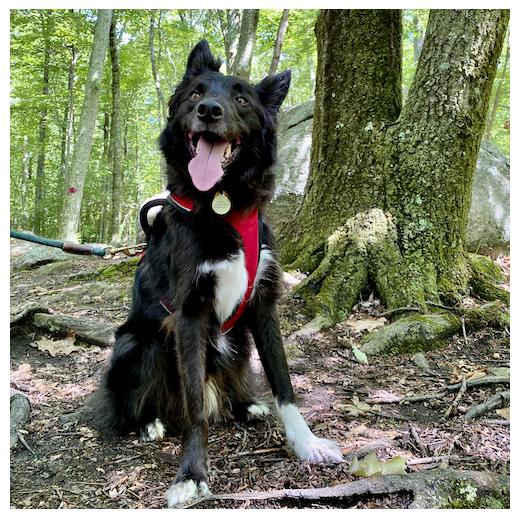

In [695]:
# As a California native I am not too mad at these results
# I am not sure if this method was most effective due to how many steps I took
# In the future I would skip a lot and at the end not use this API
# I would also change the way I found the winner as the 55.4mp 
# Thank you for reading/viewing my project!
sb.dogplot()